In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Delete any folder from Colab reposatory**

In [ ]:
# import shutil
# import os

# def delete_folder(folder_path):
#     try:
#         shutil.rmtree(folder_path)
#         print(f"Folder '{folder_path}' and its contents have been successfully deleted.")
#     except FileNotFoundError:
#         print(f"Folder '{folder_path}' not found.")
#     except Exception as e:
#         print(f"An error occurred: {e}")

# # Example usage: Delete a folder named 'example_folder'
# folder_to_delete = '/content/preprocessed_dataset'  # Replace with the actual path of the folder you want to delete
# delete_folder(folder_to_delete)

Folder '/content/preprocessed_dataset' and its contents have been successfully deleted.


### **Cloning GitHub for YOLO3 model Files**

In [ ]:
# Clone the repository for the conversion script
!git clone https://github.com/qqwweee/keras-yolo3.git

# Move into the cloned directory
%cd keras-yolo3

# Download the YOLOv3 weights file
!wget https://pjreddie.com/media/files/yolov3.weights

# Convert YOLOv3 weights to h5 format
!python convert.py yolov3.cfg yolov3.weights model_data/yolov3.h5

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 9.44 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/keras-yolo3
--2024-01-15 19:36:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.9MB/s    in 6.7s    

2024-01-15 19:36:34 (35.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

2024-01-15 19:36:35.377881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 19:36:35.377945: E external/

In [ ]:
# # code to download YOLO3 Files

# import shutil
# import os
# from google.colab import files

# # Compress the existing "keras-yolo3" folder into a zip file
# shutil.make_archive('/content/keras-yolo3', 'zip', '/content/keras-yolo3')

# # Provide the zip file for download
# files.download('/content/keras-yolo3.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Preprocessing Raw Images within Colab Reposatory**

In [ ]:
!pip install dlib scikit-image

In [ ]:
import zipfile
import os

# Specify the name of your ZIP file
zip_file_name = "/content/drive/MyDrive/Project/Classmates.zip"

# Specify the directory where you want to extract the contents
extracted_folder = "/content/Classmates"

# Create the target directory if it doesn't exist
os.makedirs(extracted_folder, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Check the extracted contents
extracted_contents = os.listdir(extracted_folder)
print("Extracted contents:", extracted_contents)


Extracted contents: ['Shahab', 'Annas', 'Umer', 'Taha', 'Adan', 'Shah Wali', 'Tehseen']


In [ ]:
import cv2
import dlib
from skimage import exposure, img_as_ubyte
import os

# Load face detector from dlib
face_detector = dlib.get_frontal_face_detector()

# Path to the directory containing raw images
raw_dataset_path = "/content/Classmates"

# Path to the directory where preprocessed images will be saved
preprocessed_dataset_path = "/content/preprocessed_dataset"
os.makedirs(preprocessed_dataset_path, exist_ok=True)

# Iterate over class folders
for class_folder in os.listdir(raw_dataset_path):
    class_path = os.path.join(raw_dataset_path, class_folder)

    # Create a folder for each class in the preprocessed dataset
    preprocessed_class_path = os.path.join(preprocessed_dataset_path, class_folder)
    os.makedirs(preprocessed_class_path, exist_ok=True)

    # Iterate over images in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Read the image
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces using dlib
        faces = face_detector(gray)

        # Process each detected face
        for i, face in enumerate(faces):
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Crop the face
            cropped_face = img[y:y+h, x:x+w]

            # Resize the face to a standard size
            resized_face = cv2.resize(cropped_face, (224, 224))

            # Normalize pixel values to a standard range (0 to 1)
            normalized_face = resized_face / 255.0

            # Save the preprocessed face
            preprocessed_image_name = f"{class_folder}_face{i+1}_{image_name}"
            preprocessed_image_path = os.path.join(preprocessed_class_path, preprocessed_image_name)
            cv2.imwrite(preprocessed_image_path, img_as_ubyte(normalized_face))

            # Augmentation: You can add additional data augmentation steps here if needed

print("Preprocessing complete.")

Preprocessing complete.


In [ ]:
!pip install facenet-pytorch

# **Preprocessing Raw Images within Google Drive**

In [ ]:
!pip install dlib scikit-image

In [ ]:
import zipfile
import os
import cv2
import dlib
from skimage import exposure, img_as_ubyte

# Specify the path to your ZIP file in Google Drive
zip_file_path = '/content/drive/MyDrive/Project/Classmates.zip'

# Specify the path for extracting contents on Google Drive
extracted_folder_path = '/content/drive/MyDrive/Project/Classmates'

# Specify the path to the preprocessed dataset on Google Drive
preprocessed_dataset_path = '/content/drive/MyDrive/Project/preprocessed_dataset'

# Delete the existing extracted folder if it exists
if os.path.exists(extracted_folder_path):
    !rm -r "$extracted_folder_path"

# Extract the contents of the ZIP file to Google Drive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Delete the existing preprocessed dataset folder if it exists
if os.path.exists(preprocessed_dataset_path):
    !rm -r "$preprocessed_dataset_path"

# Create the target directory for preprocessed images on Google Drive
os.makedirs(preprocessed_dataset_path, exist_ok=True)

# Load face detector from dlib
face_detector = dlib.get_frontal_face_detector()

# Iterate over class folders
for class_folder in os.listdir(extracted_folder_path):
    class_path = os.path.join(extracted_folder_path, class_folder)

    # Create a folder for each class in the preprocessed dataset
    preprocessed_class_path = os.path.join(preprocessed_dataset_path, class_folder)
    os.makedirs(preprocessed_class_path, exist_ok=True)

    # Iterate over images in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Read the image
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces using dlib
        faces = face_detector(gray)

        # Process each detected face
        for i, face in enumerate(faces):
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Crop the face
            cropped_face = img[y:y+h, x:x+w]

            # Resize the face to a standard size
            resized_face = cv2.resize(cropped_face, (224, 224))

            # Normalize pixel values to a standard range (0 to 1)
            normalized_face = resized_face / 255.0

            # Save the preprocessed face on Google Drive
            preprocessed_image_name = f"{class_folder}_face{i+1}_{image_name}"
            preprocessed_image_path = os.path.join(preprocessed_class_path, preprocessed_image_name)
            cv2.imwrite(preprocessed_image_path, img_as_ubyte(normalized_face))

print("Preprocessing complete.")


Preprocessing complete.


# **Face Detecting from input image using YOLO3**

### **Using YOLO3 within Colab reposatory**

In [ ]:
import cv2
import numpy as np
import os
from skimage import img_as_ubyte
from google.colab import files

# Load pre-trained YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getUnconnectedOutLayersNames()

# Path to the directory where detected faces will be saved
detected_faces_path = "/content/detected_faces"  # Change this path as needed

# Check if the folder exists
if os.path.exists(detected_faces_path):
    # If it exists, empty the folder
    for file_name in os.listdir(detected_faces_path):
        file_path = os.path.join(detected_faces_path, file_name)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                os.rmdir(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
else:
    # If it doesn't exist, create the folder
    os.makedirs(detected_faces_path)

# Upload an image
uploaded = files.upload()

# Process the uploaded image
for image_name, image_content in uploaded.items():
    # Read the image
    image = cv2.imdecode(np.frombuffer(image_content, np.uint8), -1)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces using dlib
    faces = face_detector(gray)

    # Process each detected face
    for i, face in enumerate(faces):
        x, y, w, h = face.left(), face.top(), face.width(), face.height()

        # Crop the face
        cropped_face = image[y:y+h, x:x+w]

        # Resize the face to a standard size
        resized_face = cv2.resize(cropped_face, (224, 224))

        # Normalize pixel values to a standard range (0 to 1)
        normalized_face = resized_face / 255.0

        # Apply YOLO-based person detection on the preprocessed face
        height, width, _ = resized_face.shape
        blob = cv2.dnn.blobFromImage(resized_face, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(layer_names)

        # Process YOLO output
        person_detected = False
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5 and class_id == 0:  # Assuming class 0 is a person
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    detected_person = resized_face[y:y+h, x:x+w]

                    # Save the detected person if it is not empty
                    if not np.all(detected_person == 0):
                        detected_person_name = f"detected_person_{i+1}_{image_name}"
                        detected_person_path = os.path.join(detected_faces_path, detected_person_name)
                        cv2.imwrite(detected_person_path, img_as_ubyte(detected_person))
                        person_detected = True

        if not person_detected:
            print(f"No person detected in {image_name}")

print("Person detection complete.")

Saving Shah Wali-.jpg to Shah Wali-.jpg
Person detection complete.


### **Using YOLO3 within Google Drive**

In [ ]:
import cv2
import numpy as np
import os
from skimage import img_as_ubyte
from google.colab import files

# Load pre-trained YOLO model
net = cv2.dnn.readNet("/content/drive/MyDrive/Project/keras-yolo3/yolov3.weights", "/content/drive/MyDrive/Project/keras-yolo3/yolov3.cfg")
layer_names = net.getUnconnectedOutLayersNames()

# Path to the directory where detected faces will be saved
detected_faces_path = "/content/drive/MyDrive/Project/detected_faces"  # Change this path as needed

# Check if the folder exists
if os.path.exists(detected_faces_path):
    # If it exists, empty the folder
    for file_name in os.listdir(detected_faces_path):
        file_path = os.path.join(detected_faces_path, file_name)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                os.rmdir(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
else:
    # If it doesn't exist, create the folder
    os.makedirs(detected_faces_path)

# Upload an image
uploaded = files.upload()

# Process the uploaded image
for image_name, image_content in uploaded.items():
    # Read the image
    image = cv2.imdecode(np.frombuffer(image_content, np.uint8), -1)

    # Check if the image is read correctly
    if image is not None:
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces using dlib
        faces = face_detector(gray)

        # Process each detected face
        for i, face in enumerate(faces):
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Crop the face
            cropped_face = image[y:y+h, x:x+w]

            # Resize the face to a standard size
            resized_face = cv2.resize(cropped_face, (224, 224))

            # Normalize pixel values to a standard range (0 to 1)
            normalized_face = resized_face / 255.0

            # Apply YOLO-based person detection on the preprocessed face
            height, width, _ = resized_face.shape
            blob = cv2.dnn.blobFromImage(resized_face, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
            net.setInput(blob)
            outs = net.forward(layer_names)

            # Process YOLO output
            person_detected = False
            for out in outs:
                for detection in out:
                    scores = detection[5:]
                    class_id = np.argmax(scores)
                    confidence = scores[class_id]
                    if confidence > 0.5 and class_id == 0:  # Assuming class 0 is a person
                        center_x = int(detection[0] * width)
                        center_y = int(detection[1] * height)
                        w = int(detection[2] * width)
                        h = int(detection[3] * height)

                        x = int(center_x - w / 2)
                        y = int(center_y - h / 2)

                        detected_person = resized_face[y:y+h, x:x+w]

                        # Save the detected person if it is not empty
                        if not np.all(detected_person == 0):
                            detected_person_name = f"detected_person_{i+1}_{image_name}"
                            detected_person_path = os.path.join(detected_faces_path, detected_person_name)
                            cv2.imwrite(detected_person_path, img_as_ubyte(detected_person))
                            person_detected = True

            if not person_detected:
                print(f"No person detected in {image_name}")

        print("Person detection complete.")
    else:
        print("Failed to read the image.")


Saving 1111.jpg to 1111.jpg
Person detection complete.


# **Face Detection from input image without using YOLO3**

In [ ]:
import cv2
import dlib
import numpy as np  # Add this line
from skimage import exposure, img_as_ubyte
import os
from google.colab import files

# Load face detector from dlib
face_detector = dlib.get_frontal_face_detector()

# Function to preprocess and save detected faces
def process_and_save_faces(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces using dlib
    faces = face_detector(gray)

    # Check if faces are detected
    if faces:
        # Empty the detected_faces folder if it exists
        if os.path.exists(detected_faces_path):
            for file in os.listdir(detected_faces_path):
                file_path = os.path.join(detected_faces_path, file)
                try:
                    if os.path.isfile(file_path):
                        os.unlink(file_path)
                except Exception as e:
                    print(f"Error deleting file {file_path}: {e}")

        # Process each detected face
        for i, face in enumerate(faces):
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Crop the face
            cropped_face = img[y:y+h, x:x+w]

            # Resize the face to a standard size
            resized_face = cv2.resize(cropped_face, (224, 224))

            # Normalize pixel values to a standard range (0 to 1)
            normalized_face = resized_face / 255.0

            # Save the detected face
            detected_face_name = f"detected_face{i+1}.jpg"
            detected_face_path = os.path.join(detected_faces_path, detected_face_name)
            cv2.imwrite(detected_face_path, img_as_ubyte(normalized_face))

        print("Face detection and saving complete.")
    else:
        print("No faces detected in the input image.")

# Path to the directory where detected faces will be saved
detected_faces_path = "/content/detected_faces"
os.makedirs(detected_faces_path, exist_ok=True)

# Upload an image from your PC
uploaded = files.upload()

# Check if any files were uploaded
if uploaded:
    # Read the uploaded image
    image_data = next(iter(uploaded.values()))
    img = cv2.imdecode(np.frombuffer(image_data, np.uint8), -1)

    # Process and save detected faces
    process_and_save_faces(img)
else:
    print("No image uploaded.")

Saving 1111.jpg to 1111.jpg
Face detection and saving complete.


# **Fine-tuning the Models**

## **Fine-Tuning the FaceNet Model**

### **with 20 epochs**

In [ ]:
!pip install facenet-pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define the FaceNet model architecture
class CustomInceptionResnetV1(nn.Module):
    def __init__(self, num_classes):
        super(CustomInceptionResnetV1, self).__init__()
        self.inception_resnet_v1 = InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=num_classes)

    def forward(self, x):
        return self.inception_resnet_v1(x)

# Define the dataset class
class ClassmatesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                images.append((img_path, self.class_to_idx[cls]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]

        # Skip directories
        while os.path.isdir(img_path):
            idx += 1
            img_path, label = self.images[idx]

        try:
            img = Image.open(img_path).convert("RGB")

            if self.transform:
                img = self.transform(img)

            return img, label

        except FileNotFoundError:
            print(f"File not found: {img_path}. Skipping.")
            # If file not found, move to the next one
            return self.__getitem__(idx + 1)

# Set the number of classes
num_classes = len(os.listdir('/content/preprocessed_dataset'))  # Adjust this according to your dataset

# Initialize the model
model = CustomInceptionResnetV1(num_classes)

# Set up DataLoader and other training configurations
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

# Example DataLoader
dataset = ClassmatesDataset(root_dir='/content/preprocessed_dataset', transform=transform)

# Split the dataset into training and validation sets
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create separate DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Save the trained model
torch.save(model.state_dict(), '/content/fine_tuned_model_20.pth')

# Evaluate the model on the validation set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_names = [str(cls) for cls in range(num_classes)]  # Replace with your actual class names
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=class_names))


Epoch [1/20], Loss: 1.0538197755813599
Epoch [2/20], Loss: 0.1416163295507431
Epoch [3/20], Loss: 0.03971247747540474
Epoch [4/20], Loss: 0.038716915994882584
Epoch [5/20], Loss: 0.20826134085655212
Epoch [6/20], Loss: 0.13583682477474213
Epoch [7/20], Loss: 0.4550211727619171
Epoch [8/20], Loss: 0.2727676331996918
Epoch [9/20], Loss: 0.19583818316459656
Epoch [10/20], Loss: 0.03750014677643776
Epoch [11/20], Loss: 0.10019218176603317
Epoch [12/20], Loss: 0.06691144406795502
Epoch [13/20], Loss: 0.018828008323907852
Epoch [14/20], Loss: 0.00742842722684145
Epoch [15/20], Loss: 0.03533991798758507
Epoch [16/20], Loss: 0.011223060078918934
Epoch [17/20], Loss: 0.06540395319461823
Epoch [18/20], Loss: 0.011647526174783707
Epoch [19/20], Loss: 0.173677459359169
Epoch [20/20], Loss: 0.0038738667499274015
Validation Accuracy: 66.67%
Confusion Matrix:
[[1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **With 40 epochs**

In [ ]:
!pip install facenet-pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define the FaceNet model architecture
class CustomInceptionResnetV1(nn.Module):
    def __init__(self, num_classes):
        super(CustomInceptionResnetV1, self).__init__()
        self.inception_resnet_v1 = InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=num_classes)

    def forward(self, x):
        return self.inception_resnet_v1(x)

# Define the dataset class
class ClassmatesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                images.append((img_path, self.class_to_idx[cls]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]

        # Skip directories
        while os.path.isdir(img_path):
            idx += 1
            img_path, label = self.images[idx]

        try:
            img = Image.open(img_path).convert("RGB")

            if self.transform:
                img = self.transform(img)

            return img, label

        except FileNotFoundError:
            print(f"File not found: {img_path}. Skipping.")
            # If file not found, move to the next one
            return self.__getitem__(idx + 1)

# Set the number of classes
num_classes = len(os.listdir('/content/preprocessed_dataset'))  # Adjust this according to your dataset

# Initialize the model
model = CustomInceptionResnetV1(num_classes)

# Set up DataLoader and other training configurations
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

# Example DataLoader
dataset = ClassmatesDataset(root_dir='/content/preprocessed_dataset', transform=transform)

# Split the dataset into training and validation sets
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create separate DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Save the trained model
torch.save(model.state_dict(), '/content/fine_tuned_model_40.pth')

# Evaluate the model on the validation set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_names = [str(cls) for cls in range(num_classes)]  # Replace with your actual class names
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=class_names))

Epoch [1/40], Loss: 0.6982333660125732
Epoch [2/40], Loss: 0.2499191015958786
Epoch [3/40], Loss: 0.07688117772340775
Epoch [4/40], Loss: 0.04082439839839935
Epoch [5/40], Loss: 0.16559603810310364
Epoch [6/40], Loss: 0.20242512226104736
Epoch [7/40], Loss: 0.17876245081424713
Epoch [8/40], Loss: 0.0351179875433445
Epoch [9/40], Loss: 0.07639914751052856
Epoch [10/40], Loss: 0.12234058976173401
Epoch [11/40], Loss: 0.6431804895401001
Epoch [12/40], Loss: 0.04831993952393532
Epoch [13/40], Loss: 0.19034571945667267
Epoch [14/40], Loss: 0.030244918540120125
Epoch [15/40], Loss: 0.19469299912452698
Epoch [16/40], Loss: 0.007742426358163357
Epoch [17/40], Loss: 0.01661749929189682
Epoch [18/40], Loss: 0.4945802390575409
Epoch [19/40], Loss: 0.010759062133729458
Epoch [20/40], Loss: 0.4566388726234436
Epoch [21/40], Loss: 0.01610194891691208
Epoch [22/40], Loss: 0.16490492224693298
Epoch [23/40], Loss: 0.028180798515677452
Epoch [24/40], Loss: 2.113215446472168
Epoch [25/40], Loss: 0.059938

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Fine-Tuning the VGG16 Model**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define the VGG16 model architecture for fine-tuning
class CustomVGG16(nn.Module):
    def __init__(self, num_classes):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Define the dataset class (assuming similar structure to the previous example)
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                images.append((img_path, self.class_to_idx[cls]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]

        # Skip directories
        while os.path.isdir(img_path):
            idx += 1
            img_path, label = self.images[idx]

        try:
            img = Image.open(img_path).convert("RGB")

            if self.transform:
                img = self.transform(img)

            return img, label

        except FileNotFoundError:
            print(f"File not found: {img_path}. Skipping.")
            # If file not found, move to the next one
            return self.__getitem__(idx + 1)

# Set the number of classes
num_classes = len(os.listdir('/content/preprocessed_dataset'))  # Adjust this according to your dataset

# Initialize the model
model = CustomVGG16(num_classes)

# Set up DataLoader and other training configurations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 input size
    transforms.ToTensor(),
])

# Example DataLoader
dataset = CustomDataset(root_dir='/content/preprocessed_dataset', transform=transform)

# Split the dataset into training and validation sets
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create separate DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Save the trained model
torch.save(model.state_dict(), '/content/fine_tuned_vgg16.pth')

# Evaluate the model on the validation set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_names = [str(cls) for cls in range(num_classes)]  # Replace with your actual class names
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=class_names))


Epoch [1/1], Loss: 1.892993688583374
Validation Accuracy: 25.00%
Confusion Matrix:
[[0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0]
 [2 0 0 0 1 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 2 0]
 [0 0 0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         0

    accuracy                           0.25        12
   macro avg       0.21      0.13      0.14        12
weighted avg       0.46      0.25      0.28        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define the VGG16 model architecture for fine-tuning
class CustomVGG16(nn.Module):
    def __init__(self, num_classes):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Set the number of classes
num_classes = 7  # Adjust this according to your dataset

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Save the trained model
torch.save(model.state_dict(), '/content/fine_tuned_vgg16.pth')

# Evaluate the model on the validation set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_names = [str(cls) for cls in range(num_classes)]
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=class_names))

Epoch [1/2], Loss: 1.9433894157409668
Epoch [2/2], Loss: 1.7686680555343628
Validation Accuracy: 33.33%
Confusion Matrix:
[[0 0 0 1 0 0]
 [2 1 0 0 0 1]
 [0 0 0 0 0 0]
 [1 0 1 1 0 0]
 [0 0 1 0 2 0]
 [0 0 1 0 0 0]]
Classification Report:


ValueError: Number of classes, 6, does not match size of target_names, 7. Try specifying the labels parameter

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define the VGG16 model architecture for fine-tuning
class CustomVGG16(nn.Module):
    def __init__(self, num_classes):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Define the dataset class (assuming similar structure to the previous example)
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for cls in self.classes:
            class_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                images.append((img_path, self.class_to_idx[cls]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]

        # Skip directories
        while os.path.isdir(img_path):
            idx += 1
            img_path, label = self.images[idx]

        try:
            img = Image.open(img_path).convert("RGB")

            if self.transform:
                img = self.transform(img)

            return img, label

        except FileNotFoundError:
            print(f"File not found: {img_path}. Skipping.")
            # If file not found, move to the next one
            return self.__getitem__(idx + 1)

# Set the number of classes
num_classes = len(os.listdir('/content/preprocessed_dataset'))  # Adjust this according to your dataset

# Initialize the model
model = CustomVGG16(num_classes)

# Set up DataLoader and other training configurations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 input size
    transforms.ToTensor(),
])

# Example DataLoader
dataset = CustomDataset(root_dir='/content/preprocessed_dataset', transform=transform)

# Split the dataset into training and validation sets
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create separate DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 2

# Inside the training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

    # Print class indices
    print(f'Class Indices: {model.model.classifier[-1].weight.argmax(dim=1).tolist()}')


# Save the trained model
torch.save(model.state_dict(), '/content/fine_tuned_vgg16.pth')

# Evaluate the model on the validation set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_names = [str(cls) for cls in range(num_classes)]  # Replace with your actual class names
print('Classification Report:')
print(classification_report(all_labels, all_predictions, target_names=class_names))


# **Loading the Fine-Tuned FaceNet Model**

In [ ]:
!pip install facenet-pytorch

In [ ]:
from facenet_pytorch import InceptionResnetV1, MTCNN, training, fixed_image_standardization
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import os

# Define the FaceNet model architecture
class CustomInceptionResnetV1(nn.Module):
    def __init__(self, num_classes):
        super(CustomInceptionResnetV1, self).__init__()
        self.inception_resnet_v1 = InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=num_classes)

    def forward(self, x):
        return self.inception_resnet_v1(x)

# Set the number of classes
# num_classes = len(os.listdir('/content/preprocessed_dataset'))  # Adjust this according to your dataset
num_classes = 7

# Initialize the model
model = CustomInceptionResnetV1(num_classes)

# Load the fine-tuned weights
model.load_state_dict(torch.load('/content/fine_tuned_model_20.pth'))

# Set the model to evaluation mode
model.eval()

CustomInceptionResnetV1(
  (inception_resnet_v1): InceptionResnetV1(
    (conv2d_1a): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2a): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2b): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2d_3b): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, mom

# **Loading the Fine-Tuned VGG16 Model**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import os

# Define the VGG16 model architecture for fine-tuning
class CustomVGG16(nn.Module):
    def __init__(self, num_classes):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=False)
        vgg16.classifier[-1] = nn.Linear(4096, num_classes)
        self.model = vgg16

    def forward(self, x):
        return self.model(x)

# Set the number of classes and class names
num_classes = 7  # Adjust this according to your dataset
# class_names = ['Taha', 'Adan', 'Annas', 'Tehseen', 'Umer', 'Shahab', 'Shah Wali']
class_names = ['Adan', 'Annas', 'Shah Wali', 'Shahab', 'Taha', 'Tehseen', 'Umer']

# Initialize the model
model = CustomVGG16(num_classes)

# Load the fine-tuned weights
state_dict = torch.load('/content/fine_tuned_vgg16.pth')
model.model.load_state_dict(state_dict)

# Set the model to evaluation mode
model.eval()

# Example usage with an input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image_path = '/content/Shah Wali-.jpg'  # Replace with the actual path to your image
img = Image.open(image_path).convert("RGB")
img = transform(img).unsqueeze(0)

# Make a forward pass to get predictions
with torch.no_grad():
    predictions = model(img)
    _, predicted_class = torch.max(predictions, 1)

# Map the predicted class index to the actual class name
recognized_person = class_names[predicted_class.item()]

# Display the recognized person
print(f'Recognized Person: {recognized_person}')

Recognized Person: Umer


In [ ]:
!pip install Flask


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from google.colab import files  # Import the files module for Colab

# Define the VGG16 model architecture for fine-tuning
class CustomVGG16(nn.Module):
    def __init__(self, num_classes):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=False)
        vgg16.classifier[-1] = nn.Linear(4096, num_classes)
        self.model = vgg16

    def forward(self, x):
        return self.model(x)

# Set the number of classes and class names
num_classes = 7  # Adjust this according to your dataset
class_names = ['Adan', 'Annas', 'Shah Wali', 'Shahab', 'Taha', 'Tehseen', 'Umer']

# Initialize the model
model = CustomVGG16(num_classes)

# Load the fine-tuned weights
state_dict = torch.load('/content/fine_tuned_vgg16.pth')
model.model.load_state_dict(state_dict)

# Set the model to evaluation mode
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Upload an image using Colab files module
uploaded = files.upload()

# Check if any files were uploaded
if len(uploaded) > 0:
    # Get the file path of the first uploaded file
    image_path = list(uploaded.keys())[0]

    # Example usage with the uploaded image
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0)

    # Make a forward pass to get predictions
    with torch.no_grad():
        predictions = model(img)
        _, predicted_class = torch.max(predictions, 1)

    # Map the predicted class index to the actual class name
    recognized_person = class_names[predicted_class.item()]

    # Display the recognized person
    print(f'Recognized Person: {recognized_person}')
else:
    print('No files were uploaded.')


Saving Shah Wali-.jpg to Shah Wali- (1).jpg
Recognized Person: Umer


# **Recognizing Faces from Detected Images**

In [ ]:
from PIL import Image
from torchvision import transforms
import os

# Define transformations for input images
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

# Set the model to evaluation mode
model.eval()

# Iterate through detected faces
detected_faces_folder = '/content/detected_faces'  # Adjust this path
for item in os.listdir(detected_faces_folder):
    item_path = os.path.join(detected_faces_folder, item)

    # Check if it's a file
    if os.path.isfile(item_path):
        # Load and preprocess the face image
        face_image = Image.open(item_path).convert("RGB")
        face_tensor = transform(face_image).unsqueeze(0)

        # Use the model to make predictions
        with torch.no_grad():
            output = model(face_tensor)

        # Assuming output is a tensor containing predictions, you can process it accordingly
        # For example, print the predicted class (student label)
        predicted_class = torch.argmax(output, dim=1).item()

        # Assuming you have a list of student names corresponding to the class indices
        student_names = ['Shah Wali', 'Taha', 'Umer', 'Tehseen', 'Shahab', 'Adan', 'Annas']

        # Print the predicted student name for each face
        predicted_student = student_names[predicted_class]
        print(f"Predicted Student for {item}: {predicted_student}")


Predicted Student for detected_face1.jpg: Annas


# **Part for BBox on the image**

## **previous code**

Saving Shah Wali-.jpg to Shah Wali- (7).jpg
Face detection and saving complete.
Detected Student Names: ['Shah Wali']


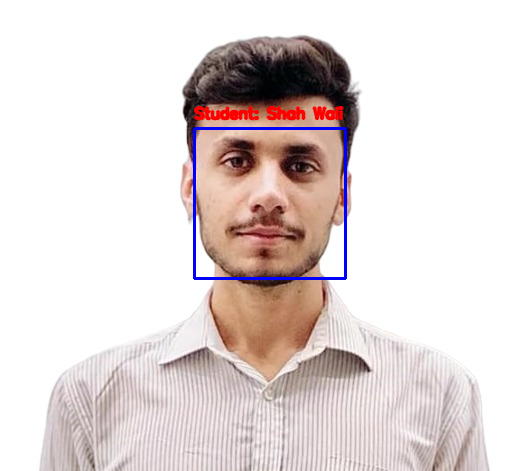

In [ ]:
import cv2
import dlib
import numpy as np
from skimage import img_as_ubyte
import os
from google.colab import files
from PIL import Image
from torchvision import transforms
from google.colab.patches import cv2_imshow

# Load face detector from dlib
face_detector = dlib.get_frontal_face_detector()

# Define transformations for input images
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

# Path to the directory where detected faces will be saved
detected_faces_path = "/content/detected_faces"
os.makedirs(detected_faces_path, exist_ok=True)

# Empty the detected faces folder if it exists
for file_name in os.listdir(detected_faces_path):
    file_path = os.path.join(detected_faces_path, file_name)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            os.rmdir(file_path)
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

# Placeholder for predicted class indices (replace this with your model's output)
predicted_classes = [0, 1, 2]  # Example: [predicted_class_1, predicted_class_2, ...]

# Assuming you have a list of student names corresponding to the class indices
#student_names = ['Adan', 'Annas', 'Shah Wali', 'Shahab', 'Taha', 'Tehseen', 'Umer']
student_names = ['Shah Wali', 'Tehseen', 'Annas', 'Umer', 'Adan', 'Taha', 'Shahab']

# Upload an image from your PC
uploaded = files.upload()

# Check if any files were uploaded
if uploaded:
    # Read the uploaded image
    image_data = next(iter(uploaded.values()))
    img = cv2.imdecode(np.frombuffer(image_data, np.uint8), -1)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces using dlib
    faces = face_detector(gray)

    # Check if faces are detected
    if faces:
        # Create a list to store detected student names
        detected_student_names = []

        # Process each detected face
        for i, face in enumerate(faces):
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Crop the face
            cropped_face = img[y:y+h, x:x+w]

            # Resize the face to a standard size
            resized_face = cv2.resize(cropped_face, (224, 224))

            # Normalize pixel values to a standard range (0 to 1)
            normalized_face = resized_face / 255.0

            # Save the detected face
            detected_face_name = f"detected_face{i+1}.jpg"
            detected_face_path = os.path.join(detected_faces_path, detected_face_name)
            cv2.imwrite(detected_face_path, img_as_ubyte(normalized_face))

            # Draw bounding box and student name on the original image
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            # Get the predicted student name for each face
            predicted_student = student_names[predicted_classes[i]]
            detected_student_names.append(predicted_student)
            cv2.putText(img, f"Student: {predicted_student}", (x, y-10), font, 0.5, (0, 0, 255), 2, cv2.LINE_AA)

        print("Face detection and saving complete.")
        print("Detected Student Names:", detected_student_names)
    else:
        print("No faces detected in the input image.")

# Display the image with bounding boxes and student names
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## **Also printing list of students**

Saving Shah Wali-.jpg to Shah Wali- (6).jpg
Recognition complete.
Recognized Student Names: ['Annas']


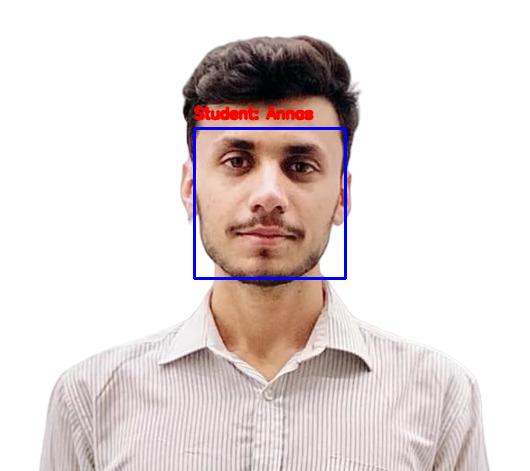

In [ ]:
import cv2
import dlib
import numpy as np
from skimage import img_as_ubyte
from PIL import Image
from torchvision import transforms
from torch.autograd import Variable
from facenet_pytorch import MTCNN, InceptionResnetV1
from google.colab.patches import cv2_imshow
from google.colab import files

# Load the trained model
model = CustomInceptionResnetV1(num_classes)
model.load_state_dict(torch.load('/content/drive/MyDrive/Project/fine_tuned_model_01.pth'))
model.eval()

# Load face detector from dlib
face_detector = dlib.get_frontal_face_detector()

# Define transformations for input images
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

# Function to recognize student from an uploaded image
def recognize_student(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces using dlib
    faces = face_detector(gray)

    # Check if faces are detected
    if faces:
        # Create a list to store recognized student names
        recognized_student_names = []

        # Process each detected face
        for i, face in enumerate(faces):
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Crop the face
            cropped_face = img[y:y+h, x:x+w]

            # Resize the face to a standard size
            resized_face = cv2.resize(cropped_face, (224, 224))

            # Normalize pixel values to a standard range (0 to 1)
            normalized_face = resized_face / 255.0

            # Convert the image to PIL format
            pil_image = Image.fromarray(img_as_ubyte(normalized_face))

            # Apply transformations
            input_tensor = transform(pil_image)
            input_batch = Variable(input_tensor.unsqueeze(0))

            # Model prediction
            with torch.no_grad():
                output = model(input_batch)

            # Get the predicted class index
            _, predicted_idx = torch.max(output.data, 1)

            # Assuming you have a list of student names corresponding to the class indices
            student_names = ['Adan', 'Annas', 'Shah Wali', 'Shahab', 'Taha', 'Tehseen', 'Umer']

            # Get the predicted student name for each face
            predicted_student = student_names[predicted_idx.item()]
            recognized_student_names.append(predicted_student)

            # Draw bounding box and student name on the original image
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img, f"Student: {predicted_student}", (x, y-10), font, 0.5, (0, 0, 255), 2, cv2.LINE_AA)

        print("Recognition complete.")
        print("Recognized Student Names:", recognized_student_names)
    else:
        print("No faces detected in the input image.")

    # Display the image with bounding boxes and student names
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Upload an image for recognition
uploaded = files.upload()

# Check if any files were uploaded
if uploaded:
    # Read the uploaded image
    image_data = next(iter(uploaded.values()))
    image_path = '/content/uploaded_image.jpg'
    with open(image_path, 'wb') as f:
        f.write(image_data)

    # Recognize student from the uploaded image
    recognize_student(image_path)